### Title: "DSCI 6601: " Machine Learning Model for Polycystic Overy Syndrome

### Name: Sharmin Akhter

### ID: 201891112

# 1. Introduction
With an increased strain on the healthcare system (especially in the present scenario) , it is often di cult for healthcare services to triage the cases they are presented with an accurate manner. This often results in patients not receiving the care they require, misdiagnosis due to human error and even complications owing to delayed treatment. The use of machine learning models, has recently taken over as a great way to serve as preliminary  lter to allow early diagnosis in the health care sector.

In this project I will review the prediction of Polycystic Overy Syndrome using Machine Learning Model. The goal here is to design a robust Machine Learning Model which will help health service provider to predict PCOS quickly reducing misdiagonsis based on the historical data of the patients.

Polycystic overy syndrome a ects are to women of reproductive age and is currently diagnosed to 4%-20% women worldwide. Exact prevalence  gures regarding PCOS are limited and unclear. The features which could possibly contritube to diagnose PCOS are Patterns of Length Of The Menstrual Cycle,Patterns Of BMI, Patterns Of Irregularity In Mensuration, Number of Follicles, Some Miscellaneous EDA.
Studies have shown that there are 44 physical and clinical parameters to detemine PCOS and infertility
related health issues for women. The source of this data is collected from 10 di erent hositals is Kerala, India.
The data is obtained from kaggle.com and here is the link for full data [full new]
(https://www.kaggle.com/code/jiangqizhu0701/pcos a guide-to practical machine learning/data).
1

## Import necessary libraries

In [132]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# 2. Data Analysis

## Data Encoder

In [133]:
class ColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

## Import Validation Dataset

In [50]:
df_val = df=pd.read_csv("allData.csv")
print(df_val.head())

  Period Length     Cycle Length    Age    City PCOS  PCOS_from Overweight  \
0      4-5 days  Keeps Variating  18-25  mumbai   No        NaN        NaN   
1      4-5 days       20-28 days  18-25  mumbai   No        NaN         No   
2      4-5 days       29-35 days  18-25  mumbai  Yes       20.0        Yes   
3      4-5 days       29-35 days  18-25  mumbai   No        NaN        NaN   
4      4-5 days       20-28 days  18-25   thane   No        NaN        NaN   

  loss weight gain / weight loss irregular or missed periods  \
0                             No                         Yes   
1                            Yes                          No   
2                            Yes                         Yes   
3                             No                          No   
4                             No                         Yes   

  Difficulty in conceiving Hair growth on Chin Hair growth  on Cheeks  \
0           Not Applicable            moderate                 normal   


### Categorical Index

In [51]:
catagorical_idx = df.select_dtypes(include=['object','bool']).dtypes
print(catagorical_idx.index)

Index(['Period Length', 'Cycle Length', 'Age', 'City', 'PCOS', 'Overweight',
       'loss weight gain / weight loss', 'irregular or missed periods',
       'Difficulty in conceiving', 'Hair growth on Chin',
       'Hair growth  on Cheeks', 'Hair growth Between breasts',
       'Hair growth  on Upper lips ', 'Hair growth in Arms',
       'Hair growth on Inner thighs', 'Acne or skin tags',
       'Hair thinning or hair loss ', 'Dark patches', 'always tired',
       'more Mood Swings', 'canned food often', 'relocated city'],
      dtype='object')


In [52]:
df_val = ColumnLabelEncoder(columns= ['Period Length', 'Cycle Length', 'Age', 'City', 'PCOS', 'Overweight',
       'loss weight gain / weight loss', 'irregular or missed periods',
       'Difficulty in conceiving', 'Hair growth on Chin',
       'Hair growth  on Cheeks', 'Hair growth Between breasts',
       'Hair growth  on Upper lips ', 'Hair growth in Arms',
       'Hair growth on Inner thighs', 'Acne or skin tags',
       'Hair thinning or hair loss ', 'Dark patches', 'always tired',
       'more Mood Swings', 'canned food often', 'relocated city']).fit_transform(df_val)
print(df_val.head())

   Period Length  Cycle Length  Age  City  PCOS  PCOS_from  Overweight  \
0              1             5    0    19     0        NaN           3   
1              1             1    0    19     0        NaN           1   
2              1             3    0    19     1       20.0           2   
3              1             3    0    19     0        NaN           3   
4              1             1    0    26     0        NaN           3   

   loss weight gain / weight loss  irregular or missed periods  \
0                               0                            2   
1                               1                            0   
2                               1                            2   
3                               0                            0   
4                               0                            2   

   Difficulty in conceiving  Hair growth on Chin  Hair growth  on Cheeks  \
0                         1                    1                       2   
1     

## Reduce the dimensionality

In [53]:
#lets see can we reduce the dimensionality of the data,
#finding out correlation matrix
corr_matrix=df_val.corrwith(df_val["PCOS"]).abs().sort_values(ascending=False)

#features with correlation more than 0.15
corr_matrix=corr_matrix[corr_matrix>0.2].index
corr_matrix

Index(['PCOS', 'loss weight gain / weight loss', 'irregular or missed periods',
       'Cycle Length', 'always tired', 'Hair growth on Chin', 'PCOS_from',
       'Hair growth  on Upper lips ', 'Overweight', 'more Mood Swings',
       'Difficulty in conceiving'],
      dtype='object')

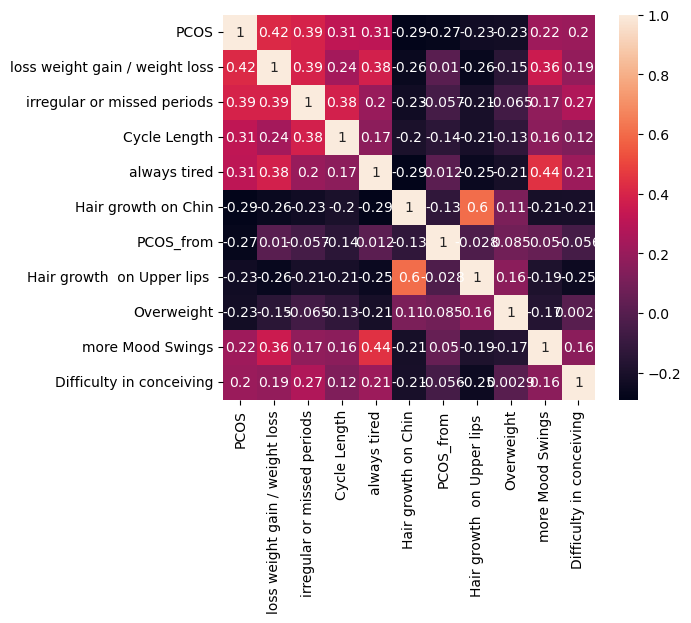

PCOS                              0
loss weight gain / weight loss    0
irregular or missed periods       0
Cycle Length                      0
always tired                      0
Hair growth on Chin               0
Hair growth  on Upper lips        0
Overweight                        0
more Mood Swings                  0
Difficulty in conceiving          0
dtype: int64


In [54]:
df_val=df_val[corr_matrix]
plt.figure(figsize=(6,5))
sn.heatmap(df_val.corr(), annot=True)
plt.show()

df_val = df_val.drop(['PCOS_from'], axis=1)

y=df_val['PCOS']
X=df_val.drop(['PCOS'], axis=1)
Xval_train,Xval_val,yval_train, yval_val=train_test_split(X,y, test_size=0.9, random_state=42)
print(df_val.isnull().sum())

In [55]:
print('Count of NAN ' + str(df_val.isnull().sum().sum()))
print(df_val)

Count of NAN 0
     PCOS  loss weight gain / weight loss  irregular or missed periods  \
0       0                               0                            2   
1       0                               1                            0   
2       1                               1                            2   
3       0                               0                            0   
4       0                               0                            2   
..    ...                             ...                          ...   
262     0                               0                            0   
263     0                               0                            0   
264     0                               0                            0   
265     0                               0                            0   
266     0                               0                            0   

     Cycle Length  always tired  Hair growth on Chin  \
0               5             0         

## Training and testing Dataset

In [56]:
df=pd.read_excel("PCOS_data_without_infertility.xlsx",sheet_name="Full_new")

pd.set_option('display.max_columns', None)

## STEP 1: preprocessing and cleaning of the data

In [57]:
#droping unnecassary columns
df = df.drop(["Unnamed: 44","Sl. No","Patient File No.","Fast food (Y/N)"],axis=1)

In [58]:
#finding out NAN in the dataframe
print(df.isnull().sum())
print('Count of NAN ' + str(df.isnull().sum().sum()))

PCOS (Y/N)                0
 Age (yrs)                0
Weight (Kg)               0
Height(Cm)                0
BMI                       0
Blood Group               0
Pulse rate(bpm)           0
RR (breaths/min)          0
Hb(g/dl)                  0
Cycle(R/I)                0
Cycle length(days)        0
Marraige Status (Yrs)     1
Pregnant(Y/N)             0
No. of aborptions         0
  I   beta-HCG(mIU/mL)    0
II    beta-HCG(mIU/mL)    0
FSH(mIU/mL)               0
LH(mIU/mL)                0
FSH/LH                    0
Hip(inch)                 0
Waist(inch)               0
Waist:Hip Ratio           0
TSH (mIU/L)               0
AMH(ng/mL)                0
PRL(ng/mL)                0
Vit D3 (ng/mL)            0
PRG(ng/mL)                0
RBS(mg/dl)                0
Weight gain(Y/N)          0
hair growth(Y/N)          0
Skin darkening (Y/N)      0
Hair loss(Y/N)            0
Pimples(Y/N)              0
Reg.Exercise(Y/N)         0
BP _Systolic (mmHg)       0
BP _Diastolic (mmHg)

In [59]:
print(df.head())

   PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Blood Group  \
0           0          28         44.6        152.0  19.300000           15   
1           0          36         65.0        161.5  24.921163           15   
2           1          33         68.8        165.0  25.270891           11   
3           0          37         65.0        148.0  29.674945           13   
4           0          25         52.0        161.0  20.060954           11   

   Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
0                78                22     10.48           2   
1                74                20     11.70           2   
2                72                18     11.80           2   
3                72                20     12.00           2   
4                72                18     10.00           2   

   Cycle length(days)  Marraige Status (Yrs)  Pregnant(Y/N)  \
0                   5                    7.0              0   
1                   

## filling out na with backfill method

In [62]:
print(str(df['Marraige Status (Yrs)'].isnull().sum().sum()))
df['Marraige Status (Yrs)'].bfill()
#print(df.isnull().sum())

1


0       7.0
1      11.0
2      10.0
3       4.0
4       1.0
       ... 
536     8.0
537     4.0
538     8.0
539     2.0
540     2.0
Name: Marraige Status (Yrs), Length: 541, dtype: float64

## again checking na to make sure data looks tidy

In [64]:
print('Count of NAN ' + str(df.isnull().sum().sum()))

print(df.head())

Count of NAN 1
   PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)         BMI  Blood Group  \
0           0          28         44.6        152.0  19.300000           15   
1           0          36         65.0        161.5  24.921163           15   
2           1          33         68.8        165.0  25.270891           11   
3           0          37         65.0        148.0  29.674945           13   
4           0          25         52.0        161.0  20.060954           11   

   Pulse rate(bpm)   RR (breaths/min)  Hb(g/dl)  Cycle(R/I)  \
0                78                22     10.48           2   
1                74                20     11.70           2   
2                72                18     11.80           2   
3                72                20     12.00           2   
4                72                18     10.00           2   

   Cycle length(days)  Marraige Status (Yrs)  Pregnant(Y/N)  \
0                   5                    7.0              0   
1    

In [66]:
#lets see can we reduce the dimensionality of the data,
#finding out correlation matrix
corr_matrix=df.corrwith(df["PCOS (Y/N)"]).abs().sort_values(ascending=False)
#features with correlation more than 0.15
corr_matrix=corr_matrix[corr_matrix>0.15].index
print(corr_matrix)


Index(['PCOS (Y/N)', 'Follicle No. (R)', 'Follicle No. (L)',
       'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)',
       'Cycle(R/I)', 'Pimples(Y/N)', 'Weight (Kg)', 'BMI',
       'Cycle length(days)', 'Hair loss(Y/N)', ' Age (yrs)', 'Waist(inch)',
       'Hip(inch)'],
      dtype='object')


In [67]:
df = df[corr_matrix]
print(df.head())

   PCOS (Y/N)  Follicle No. (R)  Follicle No. (L)  Skin darkening (Y/N)  \
0           0                 3                 3                     0   
1           0                 5                 3                     0   
2           1                15                13                     0   
3           0                 2                 2                     0   
4           0                 4                 3                     0   

   hair growth(Y/N)  Weight gain(Y/N)  Cycle(R/I)  Pimples(Y/N)  Weight (Kg)  \
0                 0                 0           2             0         44.6   
1                 0                 0           2             0         65.0   
2                 0                 0           2             1         68.8   
3                 0                 0           2             0         65.0   
4                 0                 0           2             0         52.0   

         BMI  Cycle length(days)  Hair loss(Y/N)   Age (yrs)  Waist(

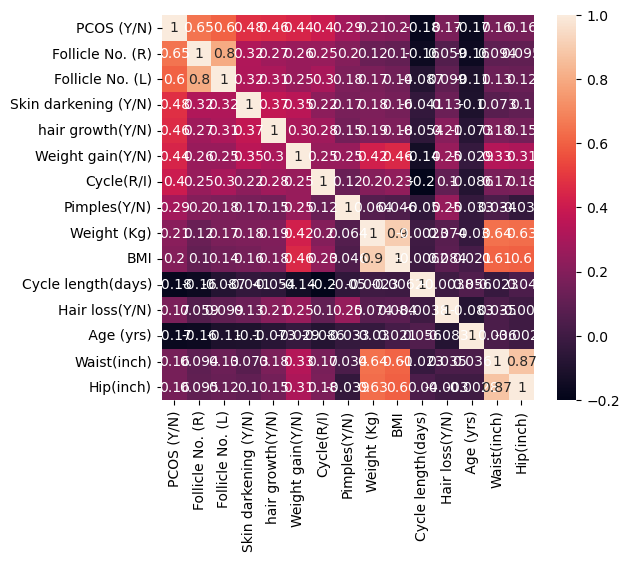

In [69]:
plt.figure(figsize=(6,5))
sn.heatmap(df.corr(), annot=True)
plt.show()


## STEP2: DATA preparation for modelling

In [123]:
y = df['PCOS (Y/N)']
X = df.drop(['PCOS (Y/N)'], axis=1)

X_train,X_test,y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=42)

# 3. Model Selection

To predict PCOS we choose 3 Machine Learning Classifier
- KNN model
- Decision Tree
- Support Vector Machine (SVM)

## STEP 3: Train Model
## Model-2 SVM

In [85]:
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np

In [86]:
svc = SVC()
p_gridsvc = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid_svc = GridSearchCV(svc, param_grid = p_gridsvc, refit=True,verbose=2,n_jobs=-1)
p_grid_fit = grid_svc.fit(X_train, y_train)
print("Optimum value of C and Gamma for SVC: ", grid_svc.best_params_)
scores_trainsvc = grid_svc.cv_results_['mean_test_score']
#print("SVC scores:",scores_trainsvc)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Optimum value of C and Gamma for SVC:  {'C': 1, 'gamma': 0.001, 'kernel': 'poly'}


## fitting model with optimum hyperparameters

In [88]:
svc2 = SVC(C=1.0, kernel='poly', gamma=0.001)
clf2 = svc2.fit(X_train,y_train)
ysvc_test_hat = clf2.predict(X_test) 
testsvc_accuracy = accuracy_score(y_test,ysvc_test_hat)*100
print("Accuracy of SVC for our testing dataset with tuning is : {:.2f}%".format(testsvc_accuracy));

Accuracy of SVC for our testing dataset with tuning is : 88.24%
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=  14.8s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.4s
[CV] END .....................C=0.1, gamma=0.01, kernel=poly; total time=   0.4s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.

## cross validation of SVC model using inner and outer loops

In [89]:
p_gridsvm = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

svm = SVC()
N_TRIALS = 48
svm_scores = np.zeros(N_TRIALS)

for i in range(N_TRIALS):
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    clf_svm = GridSearchCV(estimator=svm, param_grid=p_gridsvm, cv=inner_cv, n_jobs=-1)
    svm_score = cross_val_score(clf_svm, X=Xval_val, y=yval_val, cv=outer_cv)
    svm_scores[i] = svm_score.mean()
print("Nested score: ",svm_scores)

Nested score:  [0.81360544 0.79693878 0.78809524 0.82142857 0.80926871 0.79251701
 0.78001701 0.81326531 0.78409864 0.78384354 0.78010204 0.80076531
 0.77159864 0.78435374 0.83418367 0.77176871 0.77619048 0.80493197
 0.81335034 0.80059524 0.76386054 0.78452381 0.79634354 0.78044218
 0.82984694 0.81360544 0.79294218 0.77610544 0.80493197 0.79651361
 0.75952381 0.80093537 0.80501701 0.80501701 0.80093537 0.77176871
 0.80068027 0.79260204 0.81743197 0.81743197 0.8130102  0.77644558
 0.79260204 0.82585034 0.76309524 0.76785714 0.79277211 0.78435374]


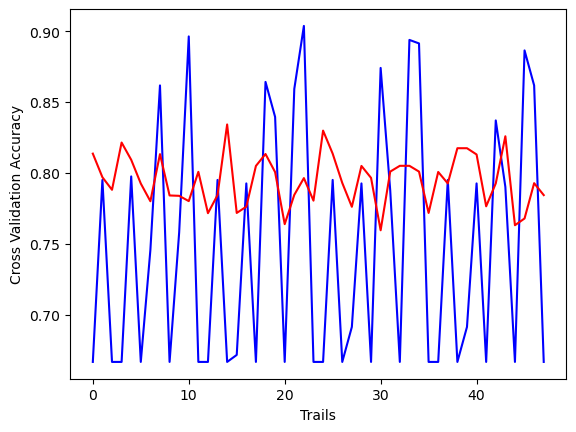

In [92]:
plt.figure(2)
plt.plot(scores_trainsvc,color='b')
plt.plot(svm_scores,color='r')
plt.xlabel('Trails')
plt.ylabel('Cross Validation Accuracy')
plt.show()

## Standard Scalar

In [102]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

## Confusion Matrix

In [103]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, y_pred_svc)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred_svc))


Accuracy :  0.9044117647058824


Accuracy :  0.9044117647058824
[[91  3]
 [10 32]]


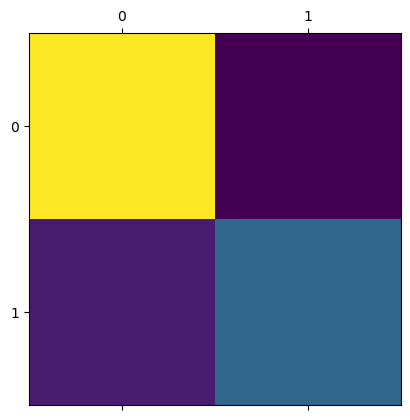

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        94
           1       0.91      0.76      0.83        42

    accuracy                           0.90       136
   macro avg       0.91      0.86      0.88       136
weighted avg       0.91      0.90      0.90       136



In [104]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred_svc))
print(cm_svc)

plt.matshow(cm_svc)
plt.show()

print(classification_report(y_test, y_pred_svc))


## MODEL 3 Decision Tree Model

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [111]:
DTC = DecisionTreeClassifier()
p_gridDTC = {'min_samples_split' : range(10,500,20),
                'max_depth': range(1,20,2),
                 'criterion' : ['gini', 'entropy']}
grid_DTC = GridSearchCV(DTC, param_grid = p_gridDTC, refit=True,verbose=2,n_jobs=-1)
p_gridDTC_fit = grid_DTC.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV] END .criterion=gini, max_depth=5, min_samples_split=370; total time=   0.0s
[CV] END .criterion=gini, max_depth=5, min_samples_split=390; total time=   0.0s
[CV] END .criterion=gini, max_depth=5, min_samples_split=390; total time=   0.0s
[CV] END .criterion=gini, max_depth=5, min_samples_split=390; total time=   0.0s
[CV] END .criterion=gini, max_depth=5, min_samples_split=390; total time=   0.0s
[CV] END .criterion=gini, max_depth=5, min_samples_split=390; total time=   0.0s
[CV] END .criterion=gini, max_depth=5, min_samples_split=410; total time=   0.0s
[CV] END .criterion=gini, max_depth=5, min_samples_split=410; total time=   0.0s
[CV] END .criterion=gini, max_depth=7, min_samples_split=290; total time=   0.0s
[CV] END .criterion=gini, max_depth=7, min_samples_split=290; total time=   0.0s
[CV] END .criterion=gini, max_depth=7, min_samples_split=310; total time=   0.0s
[CV] END .criterion=gini, max_depth=7, min_sa

[CV] END criterion=entropy, max_depth=1, min_samples_split=210; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_split=210; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_split=210; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_split=210; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_split=230; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_split=230; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_split=230; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_split=230; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_split=230; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_split=250; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_split=250; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_split=250; total time=   0.0s
[CV]

[CV] END ..criterion=gini, max_depth=9, min_samples_split=30; total time=   0.0s
[CV] END ..criterion=gini, max_depth=9, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=9, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=9, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=9, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=9, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=9, min_samples_split=70; total time=   0.0s
[CV] END ..criterion=gini, max_depth=9, min_samples_split=70; total time=   0.0s
[CV] END ..criterion=gini, max_depth=9, min_samples_split=70; total time=   0.0s
[CV] END ..criterion=gini, max_depth=9, min_samples_split=70; total time=   0.0s
[CV] END ..criterion=gini, max_depth=9, min_samples_split=70; total time=   0.0s
[CV] END ..criterion=gini, max_depth=9, min_samples_split=90; total time=   0.0s
[CV] END ..criterion=gini, m

In [119]:
print("Optimum value of Max depth and min sample split for Decision Tree: ", grid_DTC.best_params_)
scores_trainDTC = grid_DTC.cv_results_['mean_test_score']
#print("DTC scores:",scores_trainDTC)

Optimum value of Max depth and min sample split for Decision Tree:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 30}


## fitting the knn model with optimize n-neighbour value

In [115]:
clf_DTC = DecisionTreeClassifier(criterion = 'gini',max_depth = 3,min_samples_split = 30)
clf3 = clf_DTC.fit(X_train,y_train)
yDTC_test_hat = clf3.predict(X_test) 
testDTC_accuracy = accuracy_score(y_test,yDTC_test_hat)*100
print("Accuracy of DTC for our testing dataset with tuning is : {:.2f}%".format(testDTC_accuracy))

Accuracy of DTC for our testing dataset with tuning is : 83.82%


## Cross-validation with KFOLD

In [118]:
DTC2 = DecisionTreeClassifier()
N_TRIALS = 400
DTC_scores = np.zeros(N_TRIALS)

for i in range(N_TRIALS):
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    clf_DTC = GridSearchCV(estimator=DTC2, param_grid=p_gridDTC, cv=inner_cv, n_jobs=-1)
    DTC_score = cross_val_score(clf_DTC, X=Xval_val, y=yval_val, cv=outer_cv)
    DTC_scores[i] = DTC_score.mean()

Nested score:  [0.82585034 0.80510204 0.80901361 0.84634354 0.85484694 0.80510204
 0.8172619  0.80119048 0.81734694 0.82142857 0.84676871 0.80467687
 0.82159864 0.80501701 0.81326531 0.82168367 0.8005102  0.8380102
 0.82568027 0.81734694 0.80127551 0.80518707 0.78826531 0.82593537
 0.81318027 0.81352041 0.82993197 0.80076531 0.82151361 0.81743197
 0.83435374 0.80909864 0.81743197 0.82168367 0.80493197 0.80909864
 0.79659864 0.80102041 0.82176871 0.82176871 0.80068027 0.82168367
 0.83409864 0.82593537 0.80059524 0.83818027 0.80918367 0.80510204
 0.80918367 0.83392857 0.83392857 0.82168367 0.80510204 0.78018707
 0.8172619  0.78035714 0.79243197 0.78426871 0.81343537 0.82193878
 0.78409864 0.81343537 0.80085034 0.83843537 0.82159864 0.8130102
 0.81352041 0.82168367 0.84668367 0.84642857 0.84668367 0.79251701
 0.80085034 0.81717687 0.82168367 0.80076531 0.82993197 0.81369048
 0.80926871 0.83010204 0.8505102  0.80926871 0.8297619  0.78869048
 0.82151361 0.77627551 0.82159864 0.83809524 0.80

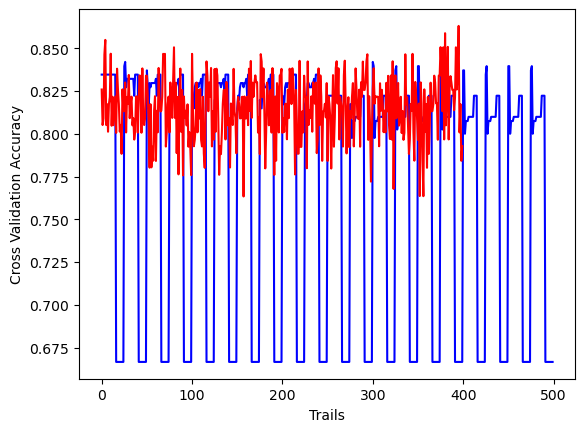

In [120]:
print("Nested score: ",DTC_scores)
plt.figure(3)
plt.plot(scores_trainDTC,color='b')
plt.plot(DTC_scores,color='r')
plt.xlabel('Trails')
plt.ylabel('Cross Validation Accuracy')
plt.show()

## Confusion Matrix

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, yDTC_test_hat)
print('Confusion matrix\n\n', cm)
plt.show()

Confusion matrix

 [[87  7]
 [15 27]]


Accuracy :  0.8382352941176471
[[87  7]
 [15 27]]


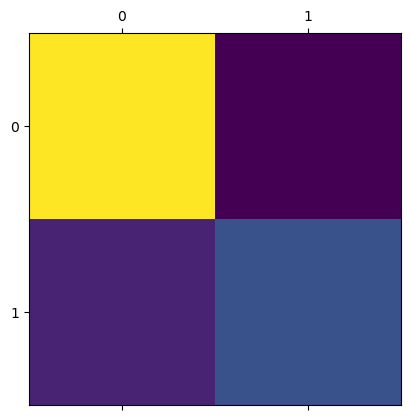

In [122]:
print ("Accuracy : ", accuracy_score(y_test, yDTC_test_hat))
print(cm)

plt.matshow(cm)
plt.show()

# Summary

- Collected training and validation data from different cities from India

- Choosen three ML models KNN, DTC, SVM based on interpretability and Complexity

- With SVM we get the best accuracy which is 90% with hyperparameter tunning

- We observed that as the complexity of the model increases, accuracy increases
